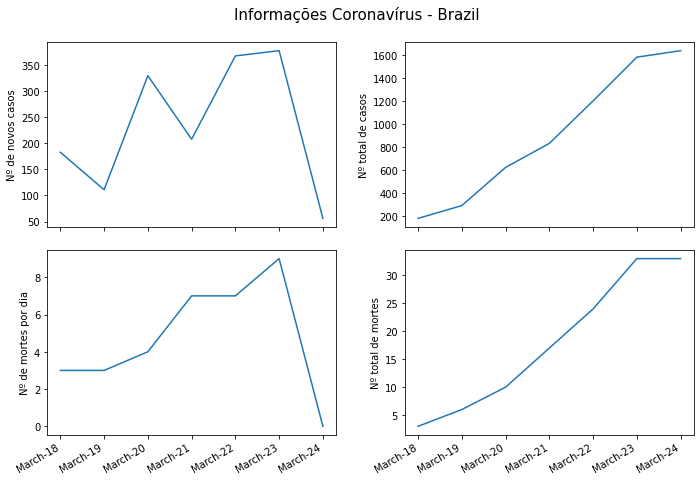

In [1]:
import IPython
import uuid
from google.colab import output
import calendar
import requests
from lxml import html
import re
import numpy as np
import matplotlib.pyplot as plt

monthsHash = {}

for month_idx in range(1, 13):
    monthsHash[calendar.month_name[month_idx]] = str(month_idx)

pais = "Brazil" #@param ["China", "Italy", "US", "Spain", "Germany", "Iran", "France", "Switzerland", "South-Korea", "UK", "Netherlands", "Austria", "Belgium", "Norway", "Portugal", "Sweden", "Canada", "Australia", "Brazil", "Malaysia", "Denmark", "Ireland", "Poland", "Greece", "Indonesia", "Philippines", "Iraq", "Algeria"]



def do_something():
    !pip install scrapy > out.out
    
    s_pais = pais.lower()
    link = "https://www.worldometers.info/coronavirus/country/" + s_pais + "/"
    response = requests.get(link)
    ht = html.fromstring(response.text)
    s_pais = link.split('/')[-2].capitalize()

    dates = ht.cssselect('.news_date')

    months = []
    days = []
    cases = []
    deaths = []
    
    for d in dates:
        r_date = re.search(r"(\w+)\s(\d+)", d.text_content())
        month = r_date.group(1)
        months.append(month)
        days.append(r_date.group(2))
        day = r_date.group(2)
        i = ht.cssselect('#newsdate2020-'+str(monthsHash[month]).zfill(2)+"-"+str(day).zfill(2))
        r_cases = re.search(r"(\d+) new cases", i[0].text_content())
        r_deaths = re.search(r"(\d+) new deaths", i[0].text_content())
        if r_cases is not None:
            cases.append(r_cases.group(1))
        else:
            cases.append("0")
        if r_deaths is not None:
            deaths.append(r_deaths.group(1))
        else:
            deaths.append("0")
    
    
    days = np.flipud(np.char.array(days))
    months = np.flipud(np.char.array(months))
    days_month = months + '-' + days
    deaths = np.flipud(np.array(deaths).astype(np.int))
    cases = np.flipud(np.array(cases).astype(np.int))
    
    fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(7,7))
    fig.suptitle("Informações Coronavírus - " + s_pais, y=1.05, fontsize = 15)
    
    fig.set_size_inches([10, 7])
    axes[0][0].plot(days_month, cases)
    axes[0][0].set(xlabel="")
    axes[0][0].set(ylabel="Nº de novos casos")
    
    axes[0][1].plot(days_month, cases.cumsum(axis=0))
    axes[0][1].set(xlabel="")
    axes[0][1].set(ylabel="Nº total de casos")
    
    axes[1][0].plot(days_month, deaths)
    axes[1][0].set(xlabel="")
    axes[1][0].set(ylabel="Nº de mortes por dia")
    
    axes[1][1].plot(days_month, deaths.cumsum(axis=0))
    axes[1][1].set(xlabel="")
    axes[1][1].set(ylabel="Nº total de mortes")
    plt.tight_layout()
    fig.autofmt_xdate()
    

do_something()
